In [11]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
from ReadersourcingToolkit import ReadersourcingToolkit
import numpy as np
import math
from scipy.stats.stats import pearsonr
from scipy.stats.stats import kendalltau
from scipy.stats.stats import gmean
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\micha\AppData\Local\Temp\ipykernel_7568\909229289.py:8: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr
C:\Users\micha\AppData\Local\Temp\ipykernel_7568\909229289.py:9: DeprecationWarning: Please import `kendalltau` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import kendalltau
C:\Users\micha\AppData\Local\Temp\ipykernel_7568\909229289.py:10: DeprecationWarning: Please import `gmean` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import gmean


In [6]:
# ------------------------------
# ---------- EXP 1-A -----------
# ------------------------------

# Analizzo l'andamento degli score di tre reader "speciali" per X shuffle dei rating di un dato seed.
# Reader 1 vota sempre nel modo "esatto" (sulla media). 
# Reader 2 vota sempre a metà scala rispetto a 1001.
# Reader 3 vota sempre sugli estremi.
# L'ordinamento desiderato degli score è Reader 1 -> Reader 2 -> Reader 3 (decrescente)

seed = ReadersourcingToolkit(
    dataset_name="seed_power_law_1", 
    dataset_folder_path="../data/{}/", 
    data_shuffled=True, 
    current_shuffle = 0,
    shuffle_amount=100,
    shuffle_special = True
)

# Plot parameters

linesize = .75
jitter = .2
alpha = .6
linewidth = .6
size = 5
flatue = {'-1': '#bfbfbf',
          '0':'#932727',
          '1':'#ffa303', 
          '2':'#27279f',
          '3':'#49e7ff'}

shuffle_perc = 100
papers_perc = 100
readers_perc = 100

# Paths

result_folder_experiments_path = "{}/experiments/".format(seed.result_folder_base_path)
result_folder_exp_1_a_path = "{}/experiment_1-a/".format(result_folder_experiments_path)
os.makedirs(result_folder_experiments_path, exist_ok=True)
os.makedirs(result_folder_exp_1_a_path, exist_ok=True)

In [12]:
df = seed.build_quantity_df_shuffle("Reader Score", shuffle_perc, readers_perc)

readers_number = df[df["Shuffle"] == 0].shape[0]

df = df[
    (df["Identifier"] == readers_number-1) |
    (df["Identifier"] == readers_number-2) |
    (df["Identifier"] == readers_number-3) 
]

df['Identifier'][df['Identifier'] == readers_number-3] = "Reader \"Good\""
df['Identifier'][df['Identifier'] == readers_number-2] = "Reader \"Bad\""
df['Identifier'][df['Identifier'] == readers_number-1] = "Reader \"Average\""

0/0 (100/100%)


C:\Users\micha\AppData\Local\Temp\ipykernel_7568\2165778046.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Identifier'][df['Identifier'] == readers_number-3] = "Reader \"Good\""
C:\Users\micha\AppData\Local\Temp\ipykernel_7568\2165

AttributeError: 'NoneType' object has no attribute 'remove'

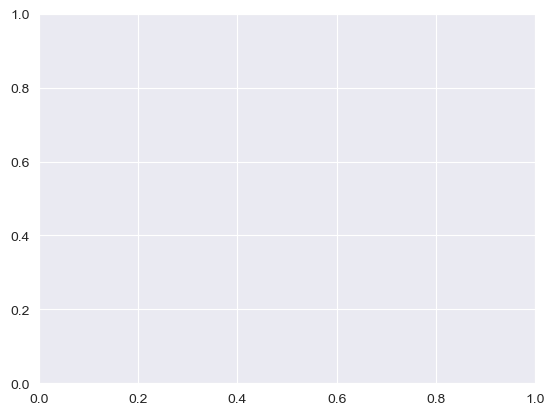

In [13]:
with plt.rc_context({'lines.linewidth': linesize}):
   ax = sns.stripplot(x = "Identifier", y = "Quantity", hue="Shuffle", data = df, 
                      alpha = .85, size=8, marker="$\circ$", palette="deep", 
                      order=["Reader \"Bad\"", "Reader \"Average\"", "Reader \"Good\""])
   ax.legend_.remove() 
   ax.set_title(f"Reader Score")
   fig = ax.get_figure()
   path = "{}/reader-score.pdf".format(result_folder_exp_1_a_path)
   fig.savefig(path, bbox_inches='tight')
   plt.close(fig)

In [14]:
# ------------------------------
# ---------- EXP 1-B -----------
# ------------------------------

# Analizzo le quantità calcolate da Readersourcing per X shuffle dei rating di un dato seed.
# Per ciascuna quantità viene costruito un grafico che mostra i valori della quantità corrente per ciascuno shuffle.

seed = ReadersourcingToolkit(
    dataset_name="seed_power_law_1", 
    dataset_folder_path="../data/{}/", 
    data_shuffled=True, 
    current_shuffle = 0,
    shuffle_amount=100
)

# Plot parameters

linesize = .75
jitter = .2
alpha = .6
linewidth = .6
size = 5
flatue = {'-1': '#bfbfbf',
          '0':'#932727',
          '1':'#ffa303', 
          '2':'#27279f',
          '3':'#49e7ff'}

shuffle_perc = 100
papers_perc = 100
readers_perc = 100

# Paths

result_folder_experiments_path = "{}/experiments/".format(seed.result_folder_base_path)
result_folder_exp_1_b_path = "{}/experiment_1-b/".format(result_folder_experiments_path)
os.makedirs(result_folder_experiments_path, exist_ok=True)
os.makedirs(result_folder_exp_1_b_path, exist_ok=True)

In [16]:
print("---------- BUILDING PAPER SCORE PLOTS ----------")

df_paper_score = seed.build_quantity_df_shuffle("Paper Score", shuffle_perc, papers_perc, True)
df_paper_score.to_pickle("{}df-paper-score.pkl".format(result_folder_exp_1_b_path))

df_std = df_paper_score.groupby('Identifier').agg("std")
df_std.sort_values(by="Quantity", ascending=False, inplace=True)
identifiers = df_std.head(15).index
df_top_std_paper_score = df_paper_score.loc[df_paper_score["Identifier"].isin(identifiers)]
df_top_std_paper_score.to_pickle("{}df-top-15-std-paper-score.pkl".format(result_folder_exp_1_b_path))
print("Final Shape: {}".format(df_top_std_paper_score.shape))

---------- BUILDING PAPER SCORE PLOTS ----------
0/100 (0/100%)
5/100 (5/100%)
10/100 (10/100%)
15/100 (15/100%)
20/100 (20/100%)
25/100 (25/100%)
30/100 (30/100%)
35/100 (35/100%)
40/100 (40/100%)
45/100 (45/100%)
50/100 (50/100%)
55/100 (55/100%)
60/100 (60/100%)
65/100 (65/100%)
70/100 (70/100%)
75/100 (75/100%)
80/100 (80/100%)
85/100 (85/100%)
90/100 (90/100%)
95/100 (95/100%)
100/100 (100/100%)
Final Shape: (15, 3)


In [17]:
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.stripplot(x = "Identifier", y = "Quantity", hue="Shuffle", data = df_top_std_paper_score,
                  dodge = True, jitter = jitter, alpha = .75, size=5, marker="$\circ$",
                       palette="deep")
    ax.legend_.remove()
    ax = sns.boxplot(x = "Identifier", y = "Quantity", data = df_top_std_paper_score, 
                     boxprops = dict(facecolor = '#FFFFFF', alpha=.75))   
    ax.set_title(f"Paper Score")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    fig = ax.get_figure()
    path = "{}/paper-score.pdf".format(result_folder_exp_1_b_path)
    fig.savefig(path, bbox_inches='tight')
    plt.close(fig)

print("---------- PAPER SCORE PLOTS BUILDING COMPLETED ----------")

C:\Users\micha\AppData\Local\Temp\ipykernel_7568\2861740126.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


---------- PAPER SCORE PLOTS BUILDING COMPLETED ----------


In [18]:
print("---------- BUILDING PAPER STEADINESS PLOTS ----------")

df_paper_steadiness = seed.build_quantity_df_shuffle("Paper Steadiness", shuffle_perc, papers_perc, True)
df_paper_steadiness.to_pickle("{}df-paper-steadiness.pkl".format(result_folder_exp_1_b_path))

df_std = df_paper_steadiness.groupby('Identifier').agg("std")
df_std.sort_values(by="Quantity", ascending=False, inplace=True)
identifiers = df_std.head(15).index
df_top_std_paper_steadiness = df_paper_steadiness.loc[df_paper_steadiness["Identifier"].isin(identifiers)]
df_top_std_paper_steadiness.to_pickle("{}df-top-15-std-paper-steadiness.pkl".format(result_folder_exp_1_b_path))
print("Final Shape: {}".format(df_top_std_paper_steadiness.shape))

---------- BUILDING PAPER STEADINESS PLOTS ----------
0/100 (0/100%)
5/100 (5/100%)
10/100 (10/100%)
15/100 (15/100%)
20/100 (20/100%)
25/100 (25/100%)
30/100 (30/100%)
35/100 (35/100%)
40/100 (40/100%)
45/100 (45/100%)
50/100 (50/100%)
55/100 (55/100%)
60/100 (60/100%)
65/100 (65/100%)
70/100 (70/100%)
75/100 (75/100%)
80/100 (80/100%)
85/100 (85/100%)
90/100 (90/100%)
95/100 (95/100%)
100/100 (100/100%)
Final Shape: (15, 3)


In [19]:
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.stripplot(x = "Identifier", y = "Quantity", hue="Shuffle", data = df_top_std_paper_steadiness,
                  dodge = True, jitter = jitter, alpha = .75, size=5, marker="$\circ$",
                       palette="deep")
    ax.legend_.remove()
    ax = sns.boxplot(x = "Identifier", y = "Quantity", data = df_top_std_paper_steadiness, 
                     boxprops = dict(facecolor = '#FFFFFF', alpha=.75))   
    ax.set_title(f"Paper Steadiness")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    fig = ax.get_figure()
    path = "{}/paper-steadiness.pdf".format(result_folder_exp_1_b_path)
    fig.savefig(path, bbox_inches='tight')
    plt.close(fig)
   
print("---------- PAPER STEADINESS PLOTS BUILDING COMPLETED ----------")

C:\Users\micha\AppData\Local\Temp\ipykernel_7568\1814752108.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


---------- PAPER STEADINESS PLOTS BUILDING COMPLETED ----------


In [20]:
print("---------- BUILDING READER SCORE PLOTS ----------")

df_reader_score = seed.build_quantity_df_shuffle("Reader Score", shuffle_perc, readers_perc, True)
df_reader_score.to_pickle("{}df-reader-score.pkl".format(result_folder_exp_1_b_path))

df_std = df_reader_score.groupby('Identifier').agg("std")
df_std.sort_values(by="Quantity", ascending=False, inplace=True)
identifiers = df_std.head(15).index
df_top_std_reader_score = df_reader_score.loc[df_reader_score["Identifier"].isin(identifiers)]
df_top_std_reader_score.to_pickle("{}df-top-15-std-reader-score.pkl".format(result_folder_exp_1_b_path))
print("Final Shape: {}".format(df_top_std_reader_score.shape))

---------- BUILDING READER SCORE PLOTS ----------
0/100 (0/100%)
5/100 (5/100%)
10/100 (10/100%)
15/100 (15/100%)
20/100 (20/100%)
25/100 (25/100%)
30/100 (30/100%)
35/100 (35/100%)
40/100 (40/100%)
45/100 (45/100%)
50/100 (50/100%)
55/100 (55/100%)
60/100 (60/100%)
65/100 (65/100%)
70/100 (70/100%)
75/100 (75/100%)
80/100 (80/100%)
85/100 (85/100%)
90/100 (90/100%)
95/100 (95/100%)
100/100 (100/100%)
Final Shape: (15, 3)


In [21]:
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.stripplot(x = "Identifier", y = "Quantity", hue="Shuffle", data = df_top_std_reader_score,
                  dodge = True, jitter = jitter, alpha = .75, size=5, marker="$\circ$",
                       palette="deep")
    ax.legend_.remove()
    ax = sns.boxplot(x = "Identifier", y = "Quantity", data = df_top_std_reader_score, 
                     boxprops = dict(facecolor = '#FFFFFF', alpha=.75))   
    ax.set_title("Reader Score")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    fig = ax.get_figure()
    path = "{}/reader-score.pdf".format(result_folder_exp_1_b_path)
    fig.savefig(path, bbox_inches='tight')
    plt.close(fig)
   
print("---------- READER SCORE PLOTS BUILDING COMPLETED ----------")

C:\Users\micha\AppData\Local\Temp\ipykernel_7568\2515156639.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


---------- READER SCORE PLOTS BUILDING COMPLETED ----------


In [22]:
print("---------- BUILDING READER STEADINESS PLOTS ----------")

df_reader_steadiness = seed.build_quantity_df_shuffle("Reader Steadiness", shuffle_perc, readers_perc, True)
df_reader_steadiness.to_pickle("{}df-reader-steadiness.pkl".format(result_folder_exp_1_b_path))

df_std = df_reader_steadiness.groupby('Identifier').agg("std")
df_std.sort_values(by="Quantity", ascending=False, inplace=True)
identifiers = df_std.head(15).index
df_top_std_reader_steadiness = df_reader_steadiness.loc[df_reader_steadiness["Identifier"].isin(identifiers)]
df_top_std_reader_steadiness.to_pickle("{}df-top-15-std-reader-steadiness.pkl".format(result_folder_exp_1_b_path))
print("Final Shape: {}".format(df_top_std_reader_score.shape))

---------- BUILDING READER STEADINESS PLOTS ----------
0/100 (0/100%)
5/100 (5/100%)
10/100 (10/100%)
15/100 (15/100%)
20/100 (20/100%)
25/100 (25/100%)
30/100 (30/100%)
35/100 (35/100%)
40/100 (40/100%)
45/100 (45/100%)
50/100 (50/100%)
55/100 (55/100%)
60/100 (60/100%)
65/100 (65/100%)
70/100 (70/100%)
75/100 (75/100%)
80/100 (80/100%)
85/100 (85/100%)
90/100 (90/100%)
95/100 (95/100%)
100/100 (100/100%)
Final Shape: (15, 3)


In [67]:
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.stripplot(x = "Identifier", y = "Quantity", hue="Shuffle", data = df_top_std_reader_steadiness,
                  dodge = True, jitter = jitter, alpha = .75, size=5, marker="$\circ$",
                       palette="deep")
    ax.legend_.remove()
    ax = sns.boxplot(x = "Identifier", y = "Quantity", data = df_top_std_reader_steadiness, 
                     boxprops = dict(facecolor = '#FFFFFF', alpha=.75))   
    ax.set_title("Reader Steadiness")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    fig = ax.get_figure()
    path = "{}/reader-steadiness.pdf".format(result_folder_exp_1_b_path)
    fig.savefig(path, bbox_inches='tight')
    plt.close(fig)
    
print("---------- READER STEADINESS PLOTS BUILDING COMPLETED ----------")

---------- READER STEADINESS PLOTS BUILDING COMPLETED ----------


In [26]:
# ------------------------------
# ---------- EXP 1-C -----------
# ------------------------------

# Le quantità calcolate da Readersourcing vengono comparate con la loro media aritmetica, geometrica, bayesiana e con la mediana.
# Gli indici standard vengono calcolati sui giudizi ricevuti da ciascun Paper e sui giudizi assegnati da ciascun Reader.

seed = ReadersourcingToolkit(
    dataset_name="seed_power_law_1", 
    dataset_folder_path="../data/{}/", 
)

# Plot parameters

linesize = .75
    
# Paths

result_folder_experiments_path = "{}/experiments/".format(seed.result_folder_base_path)
result_folder_exp_1_c_path = "{}/experiment_1-c/".format(result_folder_experiments_path)
os.makedirs(result_folder_experiments_path, exist_ok=True)
os.makedirs(result_folder_exp_1_c_path, exist_ok=True)

# Core Functions

def compute_means(raw_df, quantity_df, quantity_label, axis):
    
    raw_df.replace(0, np.nan, inplace=True)
        
    mean_df = pd.DataFrame(columns=[quantity_label])
    mean_df[quantity_label] = quantity_df["Quantity"]
    mean_df["Arithmetic Mean"] = raw_df.mean(axis=axis)
    mean_df["Geometric Mean"] = np.exp(np.log(raw_df.prod(axis=axis))/raw_df.notna().sum(axis))
    mean_df["Median"] = raw_df.median(axis=axis)
    
    mean_df.dropna(inplace=True)
   
    corr_df = pd.DataFrame(columns=[
        "Rho (Arithmetic Mean)",
        "Rho (Geometric Mean)",
        "Rho (Median)",
        "Tau (Arithmetic Mean)",
        "Tau (Geometric Mean)",
        "Tau (Median)",
    ])
    
    dict = {}
    quantity_column = mean_df[quantity_label]
    columns = mean_df.drop(quantity_label, axis=1).columns
    for col in columns:
        mean_column = mean_df[col]
        pearson_corr_val = pearsonr(quantity_column, mean_column)[0]
        if math.isnan(pearson_corr_val):
            pearson_corr_val = 0
        kendall_corr_val = kendalltau(quantity_column, mean_column)[0]
        if math.isnan(kendall_corr_val):
            kendall_corr_val = 0
        dict[f'Rho ({col})'] = pearson_corr_val
        dict[f'Tau ({col})'] = kendall_corr_val
    new_rows = pd.DataFrame([dict])
    corr_df = pd.concat([corr_df, new_rows], ignore_index=True)
    
    return corr_df, mean_df

ratings_df = seed.extract_ratings_df()
    
print("---------- BUILDING PAPER SCORE DATAFRAME ----------")
paper_score_df = seed.build_quantity_df("Paper Score", 100)
print("---------- BUILDING PAPER STEADINESS DATAFRAME ----------")
paper_steadiness_df = seed.build_quantity_df("Paper Steadiness", 100)
print("---------- BUILDING READER SCORE DATAFRAME ----------")
reader_score_df = seed.build_quantity_df("Reader Score", 100)
print("---------- BUILDING READER STEADINESS DATAFRAME ----------")
reader_steadiness_df = seed.build_quantity_df("Reader Steadiness", 100)

---------- BUILDING PAPER SCORE DATAFRAME ----------
---------- BUILDING PAPER STEADINESS DATAFRAME ----------
---------- BUILDING READER SCORE DATAFRAME ----------


E:\Dropbox\Lavoro\Progetti\Readersourcing-2.0\Sorgenti\RS_Py\notebooks\ReadersourcingToolkit.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  # Returns a dataframe with three columns
E:\Dropbox\Lavoro\Progetti\Readersourcing-2.0\Sorgenti\RS_Py\notebooks\ReadersourcingToolkit.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  # Returns a dataframe with three columns
E:\Dropbox\Lavoro\Progetti\Readersourcing-2.0\Sorgenti\RS_Py\notebooks\ReadersourcingToolkit.py:129: FutureWarning: The beha

---------- BUILDING READER STEADINESS DATAFRAME ----------


E:\Dropbox\Lavoro\Progetti\Readersourcing-2.0\Sorgenti\RS_Py\notebooks\ReadersourcingToolkit.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  # Returns a dataframe with three columns


In [27]:
# CSV Files Computation

os.makedirs("{}/csv/".format(result_folder_exp_1_c_path), exist_ok=True)

print("---------- BUILDING PAPER SCORE CORRELATION DATAFRAME ----------")
corr_df_1, mean_df_1 = compute_means(ratings_df, paper_score_df, "Paper Score", 0)
output_path = "{}csv/Corr_Df_Paper_Score.csv".format(result_folder_exp_1_c_path)
corr_df_1.to_csv(output_path, index=False)
print("Saved at path: ", output_path)

print("---------- BUILDING PAPER STEADINESS CORRELATION DATAFRAME ----------")
corr_df_2, mean_df_2 = compute_means(ratings_df, paper_steadiness_df, "Paper Steadiness", 0)
output_path = "{}csv/Corr_Df_Paper_Steadiness.csv".format(result_folder_exp_1_c_path)
corr_df_2.to_csv(output_path, index=False)
print("Saved at path: ", output_path)

print("---------- BUILDING READER SCORE CORRELATION DATAFRAME ----------")
corr_df_3, mean_df_3 = compute_means(ratings_df, reader_score_df, "Reader Score", 1)
output_path = "{}csv/Corr_Df_Reader_Score.csv".format(result_folder_exp_1_c_path)
corr_df_3.to_csv(output_path, index=False)
print("Saved at path: ", output_path)

print("---------- BUILDING READER SCORE CORRELATION DATAFRAME ----------")
corr_df_4, mean_df_4 = compute_means(ratings_df, reader_steadiness_df, "Reader Steadiness", 1)
output_path = "{}csv/Corr_Df_Reader_Steadiness.csv".format(result_folder_exp_1_c_path)
corr_df_4.to_csv(output_path, index=False)
print("Saved at path: ", output_path)

---------- BUILDING PAPER SCORE CORRELATION DATAFRAME ----------
Saved at path:  ../models/seed_power_law_1/readersourcing//experiments//experiment_1-c/csv/Corr_Df_Paper_Score.csv
---------- BUILDING PAPER STEADINESS CORRELATION DATAFRAME ----------
Saved at path:  ../models/seed_power_law_1/readersourcing//experiments//experiment_1-c/csv/Corr_Df_Paper_Steadiness.csv
---------- BUILDING READER SCORE CORRELATION DATAFRAME ----------
Saved at path:  ../models/seed_power_law_1/readersourcing//experiments//experiment_1-c/csv/Corr_Df_Reader_Score.csv
---------- BUILDING READER SCORE CORRELATION DATAFRAME ----------
Saved at path:  ../models/seed_power_law_1/readersourcing//experiments//experiment_1-c/csv/Corr_Df_Reader_Steadiness.csv


C:\Users\micha\AppData\Local\Temp\ipykernel_7568\1574014975.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_df = pd.concat([corr_df, new_rows], ignore_index=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_7568\1574014975.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_df = pd.concat([corr_df, new_rows], ignore_index=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_7568\1574014975.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is 

In [28]:
# Plotting Functions

def pformatting(val):
    out = 'N.D.'
    if val <= 0.05:
        out = 'p < .05'
    if val <= 0.01:
        out = 'p < .01'
    if val > 0.05:
        out = 'p > .05'
    return out

def custom_scatter (x, y, ax):
    rho, rhoval = pearsonr(x,y)
    try:
        tau, tauval = kendalltau(x,y)
    except OverflowError:
        tau = -10
        tauval = -10
    rhoval = pformatting(rhoval)
    tauval = pformatting(tauval)
    ax.annotate(r'$\rho$'+': p={} ({})'.format(np.round(rho,2), rhoval)+'\n'+
                r'$\tau$'+': p={} ({})'.format(np.round(tau,2), tauval),
                xy=(0.05, 0.8), fontsize = 11, xycoords='axes fraction')
                #bbox=dict(fc="white", lw= .6) ,)

def draw_regplot(quantity, sample, plots_path):
    
    print ("---------- COMPUTING PLOTS FOR {} -----------".format(quantity.upper()))
    
    quantity_label = quantity.lower().replace(" ", "_")
    x_vals = sample[quantity]
    
    current_path = "{}{}_arithmetic_mean_regplot.pdf".format(plots_path, quantity_label)
    y_vals = sample["Arithmetic Mean"]
    ax = sns.regplot(x=x_vals, y=y_vals)
    custom_scatter(x_vals, y_vals, ax)
    ax.figure.savefig(current_path, bbox_inches="tight")
    plt.close()
    print("Plot saved at path:")
    print(current_path)
    
    current_path = "{}{}_geometric_mean_regplot.pdf".format(plots_path, quantity_label)
    y_vals = sample["Geometric Mean"]
    ax = sns.regplot(x=x_vals, y=y_vals)
    custom_scatter(x_vals, y_vals, ax)
    ax.figure.savefig(current_path, bbox_inches="tight")
    plt.close()
    print("Plot saved at path:")
    print(current_path)
    
    current_path = "{}{}_median_regplot.pdf".format(plots_path, quantity_label)
    y_vals = sample["Median"]
    ax = sns.regplot(x=x_vals, y=y_vals)
    custom_scatter(x_vals, y_vals, ax)
    ax.figure.savefig(current_path, bbox_inches="tight")
    plt.close()
    print("Plot saved at path:")
    print(current_path)

plots_path = "{}/plots/".format(result_folder_exp_1_c_path)
os.makedirs(plots_path, exist_ok=True)

In [29]:
sample = mean_df_1
draw_regplot("Paper Score", sample, plots_path)

---------- COMPUTING PLOTS FOR PAPER SCORE -----------
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/paper_score_arithmetic_mean_regplot.pdf
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/paper_score_geometric_mean_regplot.pdf
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/paper_score_median_regplot.pdf


In [30]:
sample = mean_df_2
draw_regplot("Paper Steadiness", sample, plots_path)

---------- COMPUTING PLOTS FOR PAPER STEADINESS -----------
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/paper_steadiness_arithmetic_mean_regplot.pdf
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/paper_steadiness_geometric_mean_regplot.pdf
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/paper_steadiness_median_regplot.pdf


In [31]:
sample = mean_df_3
draw_regplot("Reader Score", sample, plots_path) 

---------- COMPUTING PLOTS FOR READER SCORE -----------
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/reader_score_arithmetic_mean_regplot.pdf
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/reader_score_geometric_mean_regplot.pdf
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/reader_score_median_regplot.pdf


In [32]:
sample = mean_df_4
draw_regplot("Reader Steadiness", sample, plots_path) 

---------- COMPUTING PLOTS FOR READER STEADINESS -----------
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/reader_steadiness_arithmetic_mean_regplot.pdf
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/reader_steadiness_geometric_mean_regplot.pdf
Plot saved at path:
../models/seed_power_law_1/readersourcing//experiments//experiment_1-c//plots/reader_steadiness_median_regplot.pdf


In [33]:
# ------------------------------
# ---------- EXP 1-D -----------
# ------------------------------

# Raccolgo le quantità di Readersourcing calcolate per seed con diverse dimensioni
# Tali quantità sono READER SCORE, PAPER SCORE, READER STEADINESS, PAPER STEADINESS
# Tali dimensioni sono NUMERO PAPER, NUMERO READER, PARAMETRO A POWER LAW PAPER, PARAMETRO A POWER LAW READER 
# Le quantità di Readersourcing diventano le colonne di un dataframe
# Le dimensioni considerate diventano le righe di un dataframe
# Ci saranno 4 colonne per ogni possibile combinazione di dimensioni
# Su tale dataframe viene lanciata un analisi ANOVA

# Plot parameters

linesize = .75
jitter = .2
alpha = .6
linewidth = .6
size = 5
flatue = {'-1': '#bfbfbf',
          '0':'#932727',
          '1':'#ffa303', 
          '2':'#27279f',
          '3':'#49e7ff'}

shuffle_perc = 100
papers_perc = 100
readers_perc = 100

# Paths

result_folder_experiments_path = "{}/experiments/".format("../models/seed_power_law_batch/")
result_folder_exp_1_d_path = "{}/experiment_1-d/".format(result_folder_experiments_path)
os.makedirs(result_folder_experiments_path, exist_ok=True)
os.makedirs(result_folder_exp_1_d_path, exist_ok=True)

In [34]:
print(f"---------- ANOVA DF BUILDING STARTED ----------")

anova_df_reader = pd.DataFrame(columns=["Reader Number", "Paper Number", "A_Reader", "A_Paper", "Identifier", "Reader Score", "Reader Steadiness"])
anova_df_paper = pd.DataFrame(columns=["Reader Number", "Paper Number", "A_Reader", "A_Paper", "Identifier", "Paper Score", "Paper Steadiness"])
seed = ReadersourcingToolkit()
for current_reader_number in (1000,1500,2000,2500):
    for current_paper_number in (1000,1500,2000,2500):
        for ar in (0.5,0.7,0.9):
            for ap in (0.5,0.7,0.9):
                seed = ReadersourcingToolkit(
                    dataset_name=f"seed_power_law_batch/seed_power_law_"
                                 f"{current_reader_number}_{current_paper_number}_{ar}_{ap}", 
                    dataset_folder_path="../data/{}/", 
                )
                if os.path.isdir(seed.result_folder_base_path):
                    print(f"---------- PROCESSING PARAMETERS: {current_reader_number}-{current_paper_number}-{ap}-{ar}  ----------")                    
                    df_reader_score = seed.build_quantity_df("Reader Score", 100)
                    df_reader_steadiness = seed.build_quantity_df("Reader Steadiness", 100)
                    df_reader_score.rename(columns={'Quantity':'Reader Score'}, inplace=True)
                    df_reader_steadiness.rename(columns={'Quantity':'Reader Steadiness'}, inplace=True)
                    df_reader = df_reader_score.merge(df_reader_steadiness, on='Identifier', how='left')
                    for index, row in df_reader.iterrows():
                        anova_df_reader = anova_df_reader.append({
                            'Reader Number': current_reader_number,
                            'Paper Number': current_paper_number,
                            'A_Reader': ar,
                            'A_Paper': ap,
                            'Identifier': row["Identifier"],
                            'Reader Score': row["Reader Score"],
                            'Reader Steadiness': row["Reader Steadiness"],
                        }, ignore_index=True)
                    df_paper_score = seed.build_quantity_df("Paper Score", 100)
                    df_paper_steadiness = seed.build_quantity_df("Paper Steadiness", 100)
                    df_paper_score.rename(columns={'Quantity':'Paper Score'}, inplace=True)
                    df_paper_steadiness.rename(columns={'Quantity':'Paper Steadiness'}, inplace=True)
                    df_paper = df_paper_score.merge(df_paper_steadiness, on='Identifier', how='left')
                    for index, row in df_paper.iterrows():
                        anova_df_paper = anova_df_paper.append({
                            'Reader Number': current_reader_number,
                            'Paper Number': current_paper_number,
                            'A_Reader': ar,
                            'A_Paper': ap,
                            'Identifier': row["Identifier"],
                            'Paper Score': row["Paper Score"],
                            'Paper Steadiness': row["Paper Steadiness"],
                        }, ignore_index=True)
anova_df_reader.rename(columns={
    'Reader Number':'Reader_Number', 
    'Paper Number':'Paper_Number',
    'Reader Score': "Reader_Score",
    'Reader Steadiness': "Reader_Steadiness"
}, inplace=True)
anova_df_reader[["Reader_Number", "Paper_Number", "Identifier"]] = anova_df_reader[["Reader_Number", "Paper_Number", "Identifier"]].astype(int)
path = f"{result_folder_exp_1_d_path}anova_df_reader.pkl"
anova_df_reader.to_pickle(path)
print("Anova reader dataframe saved at path: {}".format(path))
anova_df_paper.rename(columns={
    'Reader Number':'Reader_Number', 
    'Paper Number':'Paper_Number',
    'Paper Score': "Paper_Score",
    'Paper Steadiness': "Paper_Steadiness"
}, inplace=True)
anova_df_paper[["Reader_Number", "Paper_Number", "Identifier"]] = anova_df_paper[["Reader_Number", "Paper_Number", "Identifier"]].astype(int)
path = f"{result_folder_exp_1_d_path}anova_df_paper.pkl"
anova_df_paper.to_pickle(path)
print("Anova paper dataframe saved at path: {}".format(path))

print(f"---------- ANOVA DF BUILDING COMPLETED ----------")


---------- ANOVA DF BUILDING STARTED ----------
Anova reader dataframe saved at path: ../models/seed_power_law_batch//experiments//experiment_1-d/anova_df_reader.pkl
Anova paper dataframe saved at path: ../models/seed_power_law_batch//experiments//experiment_1-d/anova_df_paper.pkl
---------- ANOVA DF BUILDING COMPLETED ----------
